In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_df=pd.read_csv("Salary_Data.csv")
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
salary_df.shape

(30, 2)

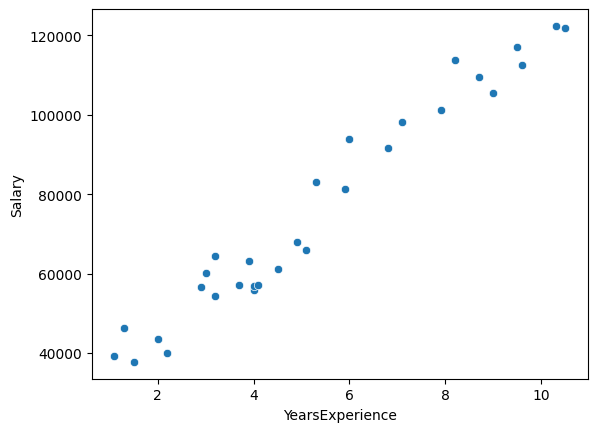

In [4]:
# visualize relationship
sns.scatterplot(x=salary_df["YearsExperience"],y=salary_df["Salary"])
plt.show()

# Independent and Dependent features

In [5]:
X=salary_df[["YearsExperience"]]
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [6]:
Y=salary_df["Salary"]
Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

# Split into Train and Test

In [7]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [36]:
X_train

,YearsExperience
12,4.0
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0
22,7.9
1,1.3
2,1.5


In [37]:
y_train

12     56957.0
0      39343.0
4      39891.0
16     66029.0
5      56642.0
13     57081.0
11     55794.0
22    101302.0
1      46205.0
2      37731.0
25    105582.0
3      43525.0
21     98273.0
26    116969.0
18     81363.0
29    121872.0
20     91738.0
7      54445.0
10     63218.0
14     61111.0
19     93940.0
6      60150.0
Name: Salary, dtype: float64

In [38]:
X_test.shape
y_test.shape

(8,)

# Standardization of the data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scale=StandardScaler()

In [39]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [40]:
X_train
X_test

array([[ 1.79640106],
       [ 0.03908914],
       [ 1.27294644],
       [ 0.1886476 ],
       [-0.59653431],
       [-0.40958624],
       [ 2.05812836],
       [ 1.45989452]])

# Model Training

In [19]:
from sklearn.linear_model import LinearRegression

In [41]:
regression_model=LinearRegression(n_jobs=-1)

In [42]:
regression_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

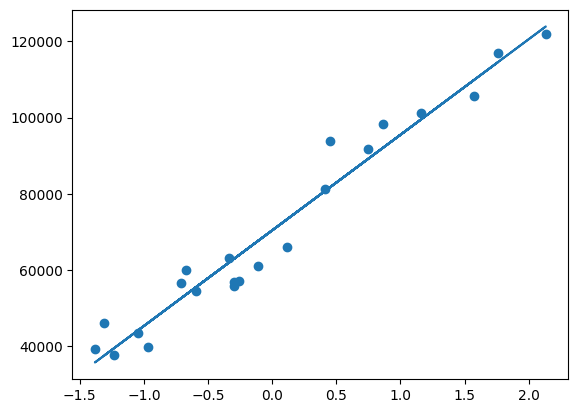

In [43]:
# best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression_model.predict(X_train))
plt.show()

In [44]:
print(f"Value of intercept: {regression_model.intercept_}")
print(f"Value of slope: {regression_model.coef_}")

Value of intercept: 70416.40909090909
Value of slope: [25063.1519945]


# Predicted Values

In [45]:
y_pred=regression_model.predict(X_test)
y_pred

array([115439.88180109,  71396.10622651, 102320.45928951,  75144.51265839,
        55465.37889103,  60150.88693088, 121999.59305688, 107005.96732936])

# Performance Metrics

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse=np.sqrt(mse)

In [47]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 38802588.99247064
Mean Absolute Error: 5056.995466663591
Root Mean Squared Error: 6229.172416338356


In [50]:
r2_score=r2_score(y_true=y_test,y_pred=y_pred)
print(r2_score)

0.9347210011126782


In [51]:
y_pred.shape

(8,)

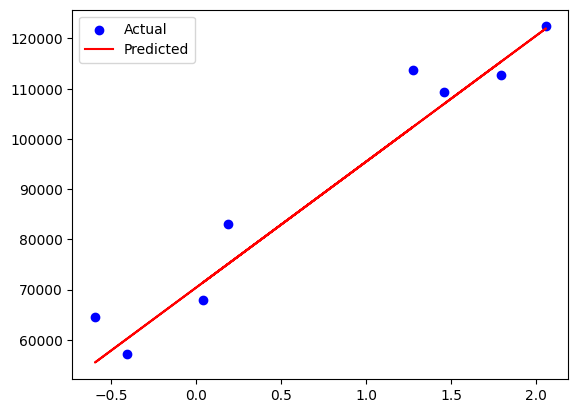

In [54]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.show()


In [57]:
years=int(input("How many years of experience you got?"))
y_new_pred=regression_model.predict(scale.transform([[years]]))
print(f"Your salary might be approx: {y_new_pred[0]}")

Your salary might be approx: 119188.28823296638


e:\ml-bootcamp\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
